In [1]:
from collections import OrderedDict

import os
import sys
import glob
from itertools import cycle

import numpy as np
import pandas as pd

from os.path import join

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import seaborn as sns
sns.set()

from os.path import join

print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.6.8 |Anaconda custom (64-bit)| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]

matplotlib version: 3.1.0
pandas version: 0.24.2
numpy version: 1.16.4
seaborn version: 0.9.0


In [2]:
sns.set(context='notebook', style='whitegrid', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

In [3]:
root_path = '..'
directories = ['1-Open/2-MD1', '1-Open/3-MD2']
starts= ['open']
basenames = ['rmsd_to_open_', 'rmsd_to_closed_']
extension = '.dat'

runs = ['1','2','3','4','5']  

dfs = OrderedDict()  # Mapping of system name to list of state DataFrames
rmsd_files = []
count=0
for directory in directories:
    for start in starts:
        for run in runs:
            count = count+1
            for basename in basenames:
                filestring=start+'_'+basename+run+extension
                file_glob = os.path.join(root_path, directory, filestring)
                files = glob.glob(file_glob)             
                for f in files:
                    # Read each into a file to be put into a dict
                    df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['frame', r'RMSD ($\AA$)'])
                    df[r'Time ($\mu$s)']=df['frame']*50/1000000
                    df['Run'] = int('{0}'.format(run))
                    df['Reference']=basename.strip('_')
                    df['Type']=start
                    df['Type_run']=start+'_'+str(count)
                    rmsd_files.append(df)
df_all1=pd.concat(rmsd_files)
df_all1



,frame,RMSD ($\AA$),Time ($\mu$s),Run,Reference,Type,Type_run
0,1,1.0089,0.00005,1,rmsd_to_open,open,open_1
1,2,0.9707,0.00010,1,rmsd_to_open,open,open_1
2,3,0.9916,0.00015,1,rmsd_to_open,open,open_1
3,4,1.1117,0.00020,1,rmsd_to_open,open,open_1
4,5,1.2100,0.00025,1,rmsd_to_open,open,open_1
5,6,0.9842,0.00030,1,rmsd_to_open,open,open_1
6,7,0.9748,0.00035,1,rmsd_to_open,open,open_1
7,8,1.0515,0.00040,1,rmsd_to_open,open,open_1
8,9,1.1225,0.00045,1,rmsd_to_open,open,open_1
9,10,1.0064,0.00050,1,rmsd_to_open,open,open_1


/home/el14718/Software/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


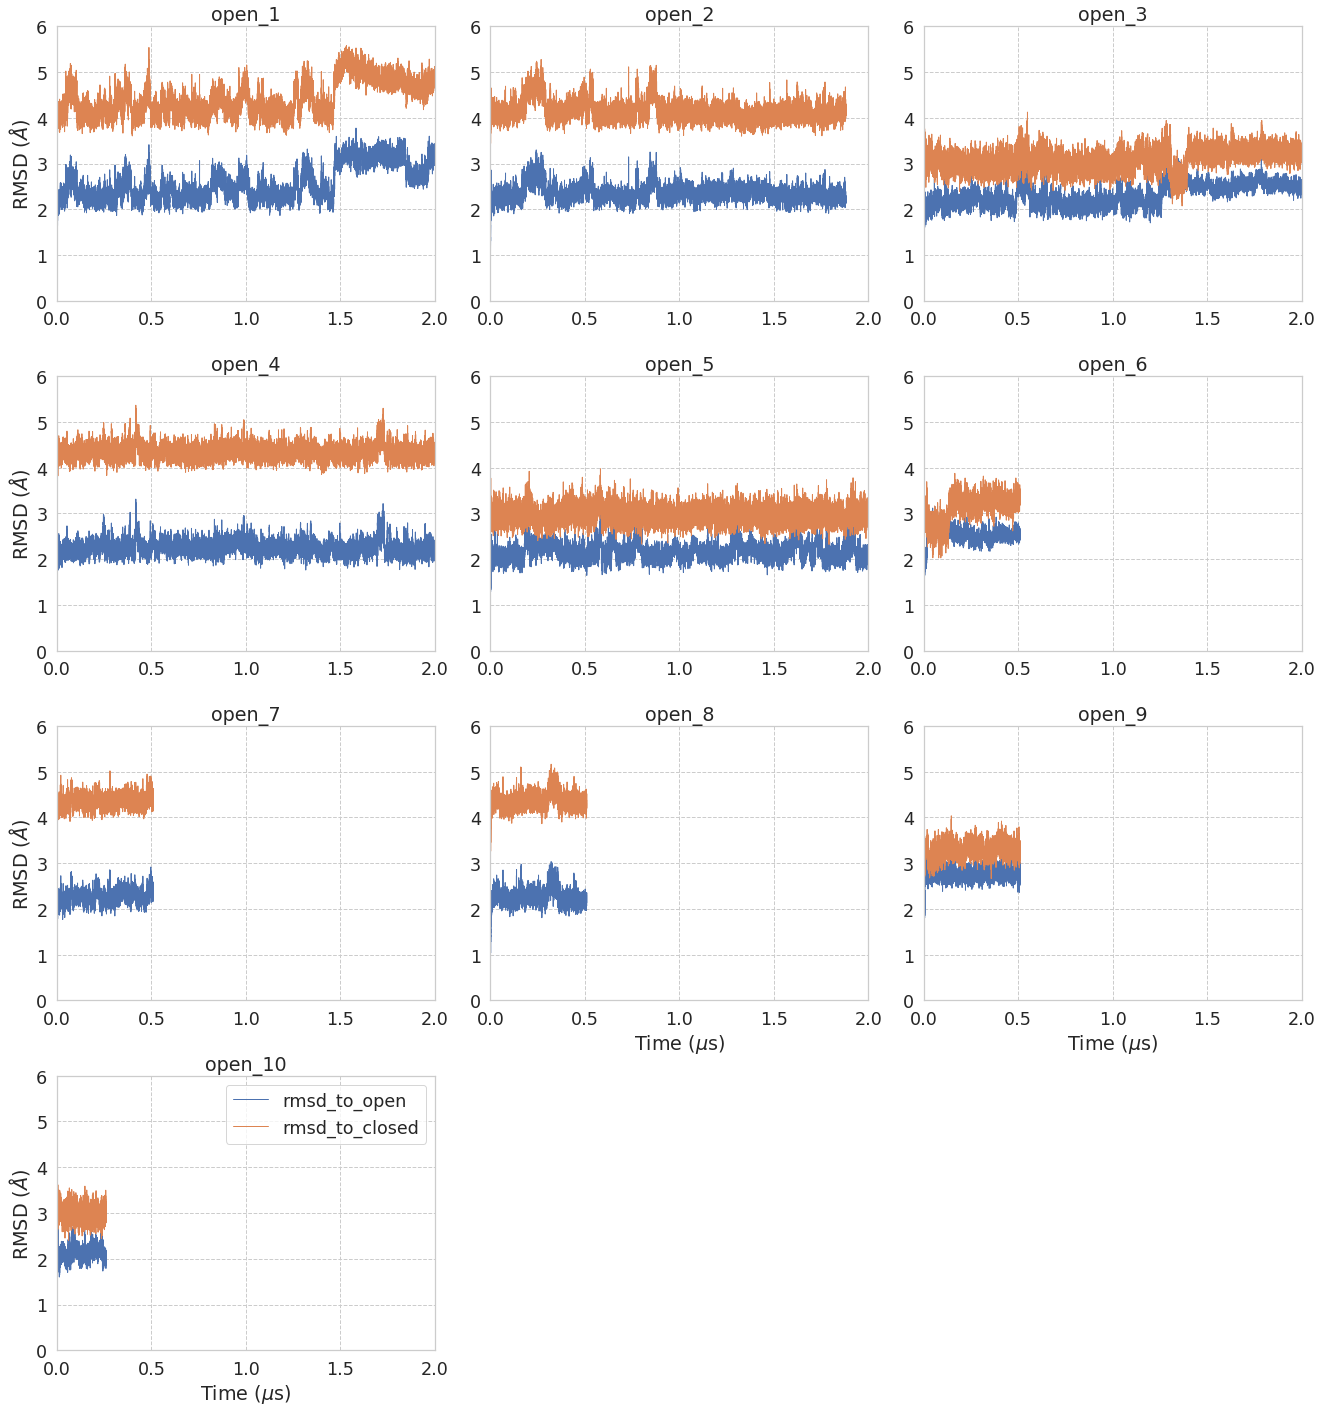

In [4]:
grid = sns.FacetGrid(df_all1, col="Type_run", col_wrap=3, hue="Reference", size=5, aspect=1.25,\
                     sharex=False, sharey=False, despine=False, legend_out=False)
grid = grid.map(plt.plot, r'Time ($\mu$s)', r'RMSD ($\AA$)',linewidth=1).set_titles("{col_name}")
#grid.map(plt.axvline, x=0.01, ls="-") 
grid.set(xlim=(0, 2) , ylim=(0, 6))
plt.legend()

plt.savefig('./open_rmsd.png')
plt.show()

In [5]:
root_path = '..'
directories = ['2-Closed/2-MD1','2-Closed/3-MD2']
starts= ['closed']
basenames = ['rmsd_to_open_', 'rmsd_to_closed_']
extension = '.dat'

runs = ['1','2','3','4','5']  

dfs = OrderedDict()  # Mapping of system name to list of state DataFrames
rmsd_files = []
count=0
for directory in directories:
    for start in starts:
        
        for run in runs:
            count = count +1
            for basename in basenames:
                filestring=start+'_'+basename+run+extension
                file_glob = os.path.join(root_path, directory, filestring)
                files = glob.glob(file_glob)
                for f in files:
                    # Read each into a file to be put into a dict
                    df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['frame', r'RMSD ($\AA$)'])
                    df[r'Time ($\mu$s)']=df['frame']*50/1000000
                    df['Run'] = int('{0}'.format(run))
                    df['Reference']=basename.strip('_')
                    df['Type']=start
                    df['Type_run']=start+'_'+str(count)
                    rmsd_files.append(df)
df_all2=pd.concat(rmsd_files)
df_all2


,frame,RMSD ($\AA$),Time ($\mu$s),Run,Reference,Type,Type_run
0,1,3.1327,0.00005,1,rmsd_to_open,closed,closed_1
1,2,3.3215,0.00010,1,rmsd_to_open,closed,closed_1
2,3,2.9228,0.00015,1,rmsd_to_open,closed,closed_1
3,4,3.1992,0.00020,1,rmsd_to_open,closed,closed_1
4,5,2.9789,0.00025,1,rmsd_to_open,closed,closed_1
5,6,2.8584,0.00030,1,rmsd_to_open,closed,closed_1
6,7,2.8680,0.00035,1,rmsd_to_open,closed,closed_1
7,8,2.8159,0.00040,1,rmsd_to_open,closed,closed_1
8,9,2.7652,0.00045,1,rmsd_to_open,closed,closed_1
9,10,2.9834,0.00050,1,rmsd_to_open,closed,closed_1


/home/el14718/Software/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


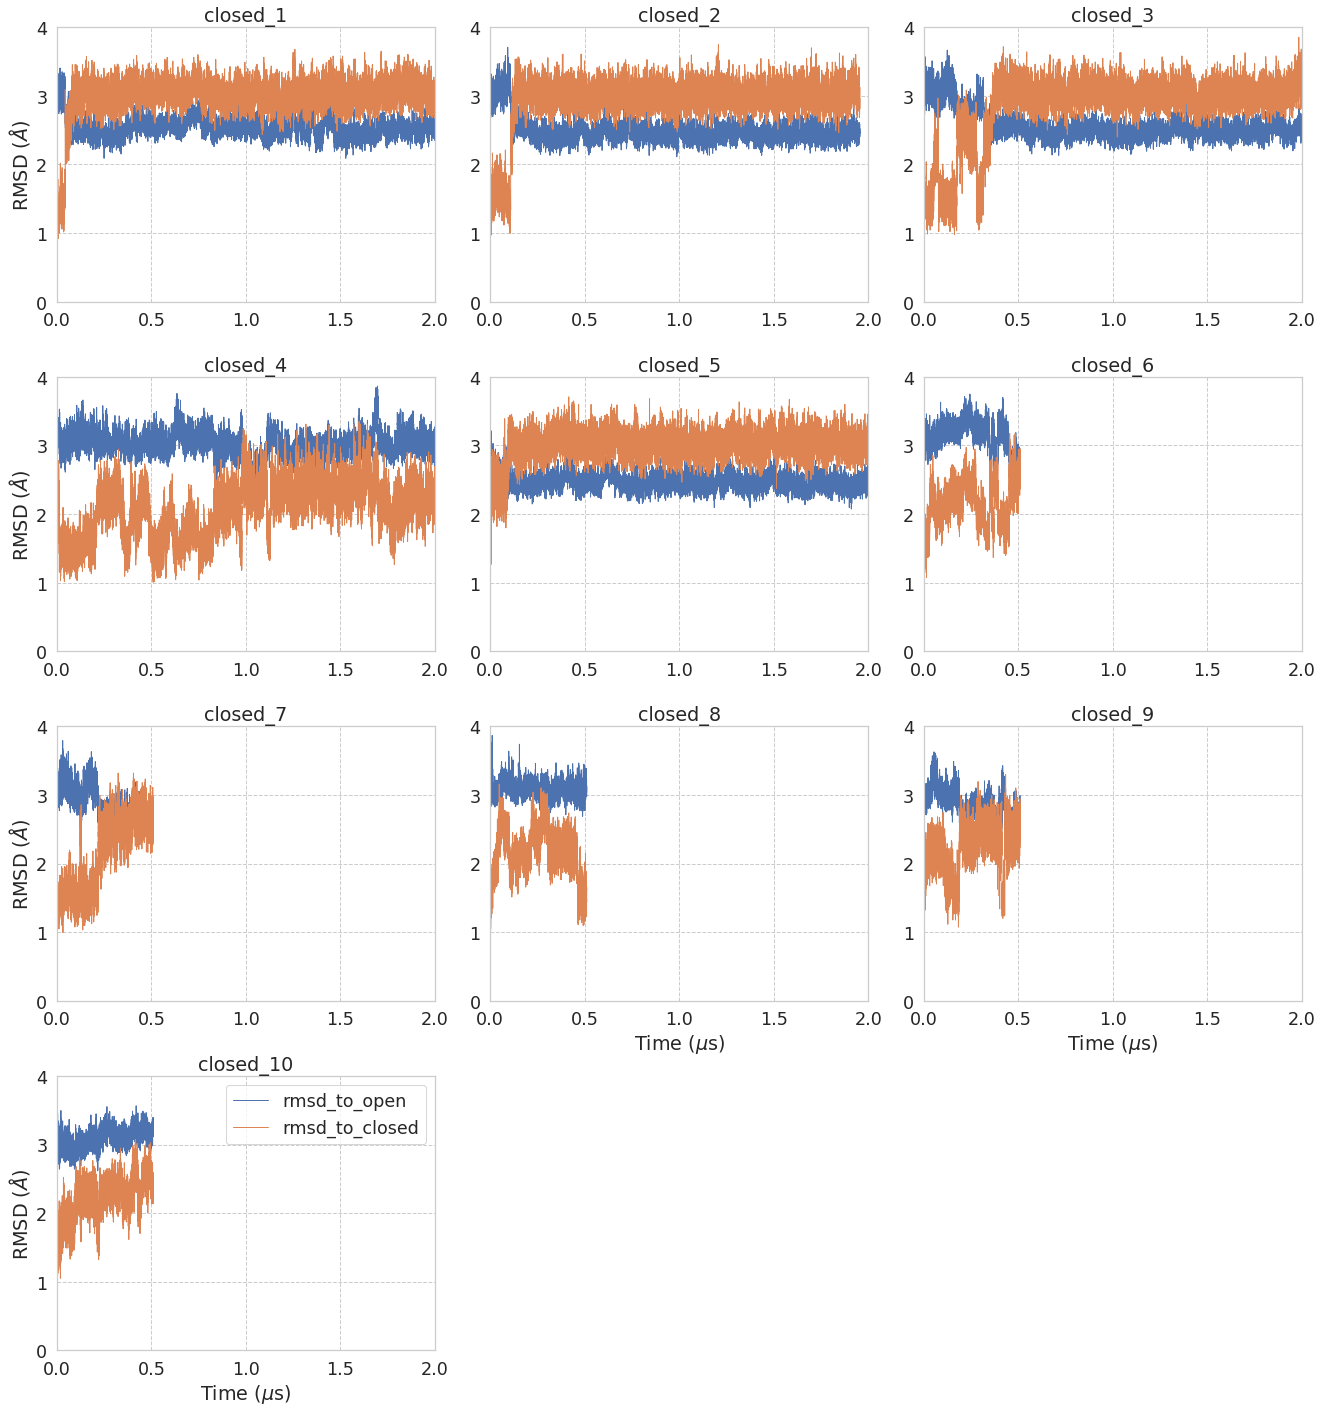

In [6]:
grid = sns.FacetGrid(df_all2, col="Type_run", col_wrap=3, hue="Reference", size=5, aspect=1.25,\
                     sharex=False, sharey=False, despine=False, legend_out=False)
grid = grid.map(plt.plot, r'Time ($\mu$s)', r'RMSD ($\AA$)',linewidth=1).set_titles("{col_name}")
grid.set(xlim=(0, 2) , ylim=(0, 4))
plt.legend()

plt.savefig('./closed_rmsd.png')

plt.show()

In [7]:
root_path = '..'
directories = ['1-Open/2-MD1','2-Closed/2-MD1',]
starts= ['closed', 'open']
basename = 'rmsd_to_open_'
extension = '.dat'

runs = ['1','2','3','4','5']  

count=0
dfs = OrderedDict()  # Mapping of system name to list of state DataFrames
rmsd_files = []

for directory in directories:
    for start in starts:
        for run in runs:
            filestring=start+'_'+basename+run+extension
            file_glob = os.path.join(root_path, directory, filestring)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['frame', r'RMSD to Open ($\AA$)'])
                df[r'Time ($\mu$s)']=df['frame']*50/1000000
                df['Run'] = int('{0}'.format(run))
                df['Reference']=basename.strip('_')
                df['Type']=start
                df['Type_run']=start+'1_'+run
                rmsd_files.append(df)
df1=pd.concat(rmsd_files)
df1

,frame,RMSD to Open ($\AA$),Time ($\mu$s),Run,Reference,Type,Type_run
0,1,1.0089,0.00005,1,rmsd_to_open,open,open1_1
1,2,0.9707,0.00010,1,rmsd_to_open,open,open1_1
2,3,0.9916,0.00015,1,rmsd_to_open,open,open1_1
3,4,1.1117,0.00020,1,rmsd_to_open,open,open1_1
4,5,1.2100,0.00025,1,rmsd_to_open,open,open1_1
5,6,0.9842,0.00030,1,rmsd_to_open,open,open1_1
6,7,0.9748,0.00035,1,rmsd_to_open,open,open1_1
7,8,1.0515,0.00040,1,rmsd_to_open,open,open1_1
8,9,1.1225,0.00045,1,rmsd_to_open,open,open1_1
9,10,1.0064,0.00050,1,rmsd_to_open,open,open1_1


In [8]:
root_path = '..'
directories = ['1-Open/3-MD2','2-Closed/3-MD2']
starts= ['closed', 'open']
basename = 'rmsd_to_open_'
extension = '.dat'

runs = ['1','2','3','4','5']  

dfs = OrderedDict()  # Mapping of system name to list of state DataFrames
rmsd_files = []

for directory in directories:
    for start in starts:
        for run in runs:
            filestring=start+'_'+basename+run+extension
            file_glob = os.path.join(root_path, directory, filestring)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['frame', r'RMSD to Open ($\AA$)'])
                df[r'Time ($\mu$s)']=df['frame']*50/1000000
                df['Run'] = int('{0}'.format(run))
                df['Reference']=basename.strip('_')
                df['Type']=start
                df['Type_run']=start+'2_'+run
                rmsd_files.append(df)
df2=pd.concat(rmsd_files)
df2

,frame,RMSD to Open ($\AA$),Time ($\mu$s),Run,Reference,Type,Type_run
0,1,1.0571,0.00005,1,rmsd_to_open,open,open2_1
1,2,1.1420,0.00010,1,rmsd_to_open,open,open2_1
2,3,1.0549,0.00015,1,rmsd_to_open,open,open2_1
3,4,1.0244,0.00020,1,rmsd_to_open,open,open2_1
4,5,1.0662,0.00025,1,rmsd_to_open,open,open2_1
5,6,1.0358,0.00030,1,rmsd_to_open,open,open2_1
6,7,1.0620,0.00035,1,rmsd_to_open,open,open2_1
7,8,1.1942,0.00040,1,rmsd_to_open,open,open2_1
8,9,1.1428,0.00045,1,rmsd_to_open,open,open2_1
9,10,1.1844,0.00050,1,rmsd_to_open,open,open2_1


In [9]:
root_path = '..'
directories = ['1-Open/2-MD1','2-Closed/2-MD1']
starts= ['closed', 'open']
basename = 'rmsd_to_closed_'
extension = '.dat'

runs = ['1','2','3','4','5']  

dfs = OrderedDict()  # Mapping of system name to list of state DataFrames
rmsd_files = []

for directory in directories:
    for start in starts:
        for run in runs:
            filestring=start+'_'+basename+run+extension
            file_glob = os.path.join(root_path, directory, filestring)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['frame', r'RMSD to Closed ($\AA$)'])
                df[r'Time ($\mu$s)']=df['frame']*50/1000000
                df['Run'] = int('{0}'.format(run))
                df['Reference']=basename.strip('_')
                df['Type']=start
                df['Type_run']=start+'1_'+run
                rmsd_files.append(df)
df3=pd.concat(rmsd_files)
df3

,frame,RMSD to Closed ($\AA$),Time ($\mu$s),Run,Reference,Type,Type_run
0,1,3.3276,0.00005,1,rmsd_to_closed,open,open1_1
1,2,3.2902,0.00010,1,rmsd_to_closed,open,open1_1
2,3,3.3135,0.00015,1,rmsd_to_closed,open,open1_1
3,4,3.4717,0.00020,1,rmsd_to_closed,open,open1_1
4,5,3.5352,0.00025,1,rmsd_to_closed,open,open1_1
5,6,3.4092,0.00030,1,rmsd_to_closed,open,open1_1
6,7,3.2720,0.00035,1,rmsd_to_closed,open,open1_1
7,8,3.4875,0.00040,1,rmsd_to_closed,open,open1_1
8,9,3.4158,0.00045,1,rmsd_to_closed,open,open1_1
9,10,3.1282,0.00050,1,rmsd_to_closed,open,open1_1


In [10]:
root_path = '..'
directories = ['1-Open/3-MD2','2-Closed/3-MD2']
starts= ['closed', 'open']
basename = 'rmsd_to_closed_'
extension = '.dat'

runs = ['1','2','3','4','5']  

dfs = OrderedDict()  # Mapping of system name to list of state DataFrames
rmsd_files = []

for directory in directories:
    for start in starts:
        for run in runs:
            filestring=start+'_'+basename+run+extension
            file_glob = os.path.join(root_path, directory, filestring)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['frame', r'RMSD to Closed ($\AA$)'])
                df[r'Time ($\mu$s)']=df['frame']*50/1000000
                df['Run'] = int('{0}'.format(run))
                df['Reference']=basename.strip('_')
                df['Type']=start
                df['Type_run']=start+'2_'+run
                rmsd_files.append(df)
df4=pd.concat(rmsd_files)
df4

,frame,RMSD to Closed ($\AA$),Time ($\mu$s),Run,Reference,Type,Type_run
0,1,3.3487,0.00005,1,rmsd_to_closed,open,open2_1
1,2,3.3486,0.00010,1,rmsd_to_closed,open,open2_1
2,3,3.1984,0.00015,1,rmsd_to_closed,open,open2_1
3,4,3.3424,0.00020,1,rmsd_to_closed,open,open2_1
4,5,3.2381,0.00025,1,rmsd_to_closed,open,open2_1
5,6,3.2711,0.00030,1,rmsd_to_closed,open,open2_1
6,7,3.3276,0.00035,1,rmsd_to_closed,open,open2_1
7,8,3.4435,0.00040,1,rmsd_to_closed,open,open2_1
8,9,3.2585,0.00045,1,rmsd_to_closed,open,open2_1
9,10,3.3200,0.00050,1,rmsd_to_closed,open,open2_1


In [13]:
dfa = pd.concat([df1,df2])
dfb= pd.concat([df3,df4])

In [14]:
df_all = dfa
df_all[r'RMSD to Closed ($\AA$)']=dfb[r'RMSD to Closed ($\AA$)']
df_all

,frame,RMSD to Open ($\AA$),Time ($\mu$s),Run,Reference,Type,Type_run,RMSD to Closed ($\AA$)
0,1,1.0089,0.00005,1,rmsd_to_open,open,open1_1,3.3276
1,2,0.9707,0.00010,1,rmsd_to_open,open,open1_1,3.2902
2,3,0.9916,0.00015,1,rmsd_to_open,open,open1_1,3.3135
3,4,1.1117,0.00020,1,rmsd_to_open,open,open1_1,3.4717
4,5,1.2100,0.00025,1,rmsd_to_open,open,open1_1,3.5352
5,6,0.9842,0.00030,1,rmsd_to_open,open,open1_1,3.4092
6,7,0.9748,0.00035,1,rmsd_to_open,open,open1_1,3.2720
7,8,1.0515,0.00040,1,rmsd_to_open,open,open1_1,3.4875
8,9,1.1225,0.00045,1,rmsd_to_open,open,open1_1,3.4158
9,10,1.0064,0.00050,1,rmsd_to_open,open,open1_1,3.1282


In [15]:
s1 = pd.Series([0.0,3.1458])
s2 = pd.Series([3.1458,0.0])
s3 = pd.Series(['open','closed'])
d={r'RMSD to Open ($\AA$)': s1, r'RMSD to Closed ($\AA$)': s2, 'Type':s3}
df_xray=pd.DataFrame(d)
df_xray

,RMSD to Open ($\AA$),RMSD to Closed ($\AA$),Type
0,0.0000,3.1458,open
1,3.1458,0.0000,closed


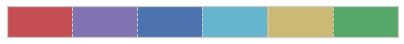

In [16]:
deep2=["#C44E52","#8172B2","#4C72B0",
       "#64B5CD", "#CCB974", "#55A868"]
palette=sns.color_palette(deep2)

sns.palplot(palette)

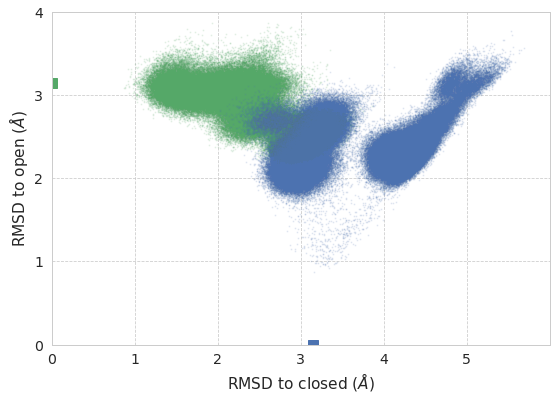

In [36]:
deep2=["#55A868", "#4C72B0","#55A868","#4C72B0",
        ]
palette=sns.color_palette(deep2)

sns.set(context='paper', style='whitegrid', palette=sns.color_palette(deep2), font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'}, color_codes=False)

fig, axes = plt.subplots(figsize=(8, 8))



df_all.groupby("Type").plot(x=r'RMSD to Closed ($\AA$)', y=r'RMSD to Open ($\AA$)',
                            ax=axes, marker=".", ms=2, ls='None', alpha=0.1)

df_xray.groupby("Type").plot(x=r'RMSD to Closed ($\AA$)', y=r'RMSD to Open ($\AA$)',
                            ax=axes, marker="s", ms=10, ls='None')


start, stop = axes.get_xlim()
loc = plticker.MultipleLocator(base=1)
axes.xaxis.set_major_locator(loc)
axes.yaxis.set_major_locator(loc)
axes.set_aspect('equal')
axes.set_xlabel(r'RMSD to closed ($\AA$)')
axes.set_ylabel(r'RMSD to open ($\AA$)')
axes.set(xlim=(0,6) , ylim=(0, 4))
axes.legend_.remove()



plt.savefig('./rmsd_all.png', dpi=400)
plt.show()

/home/el14718/Software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


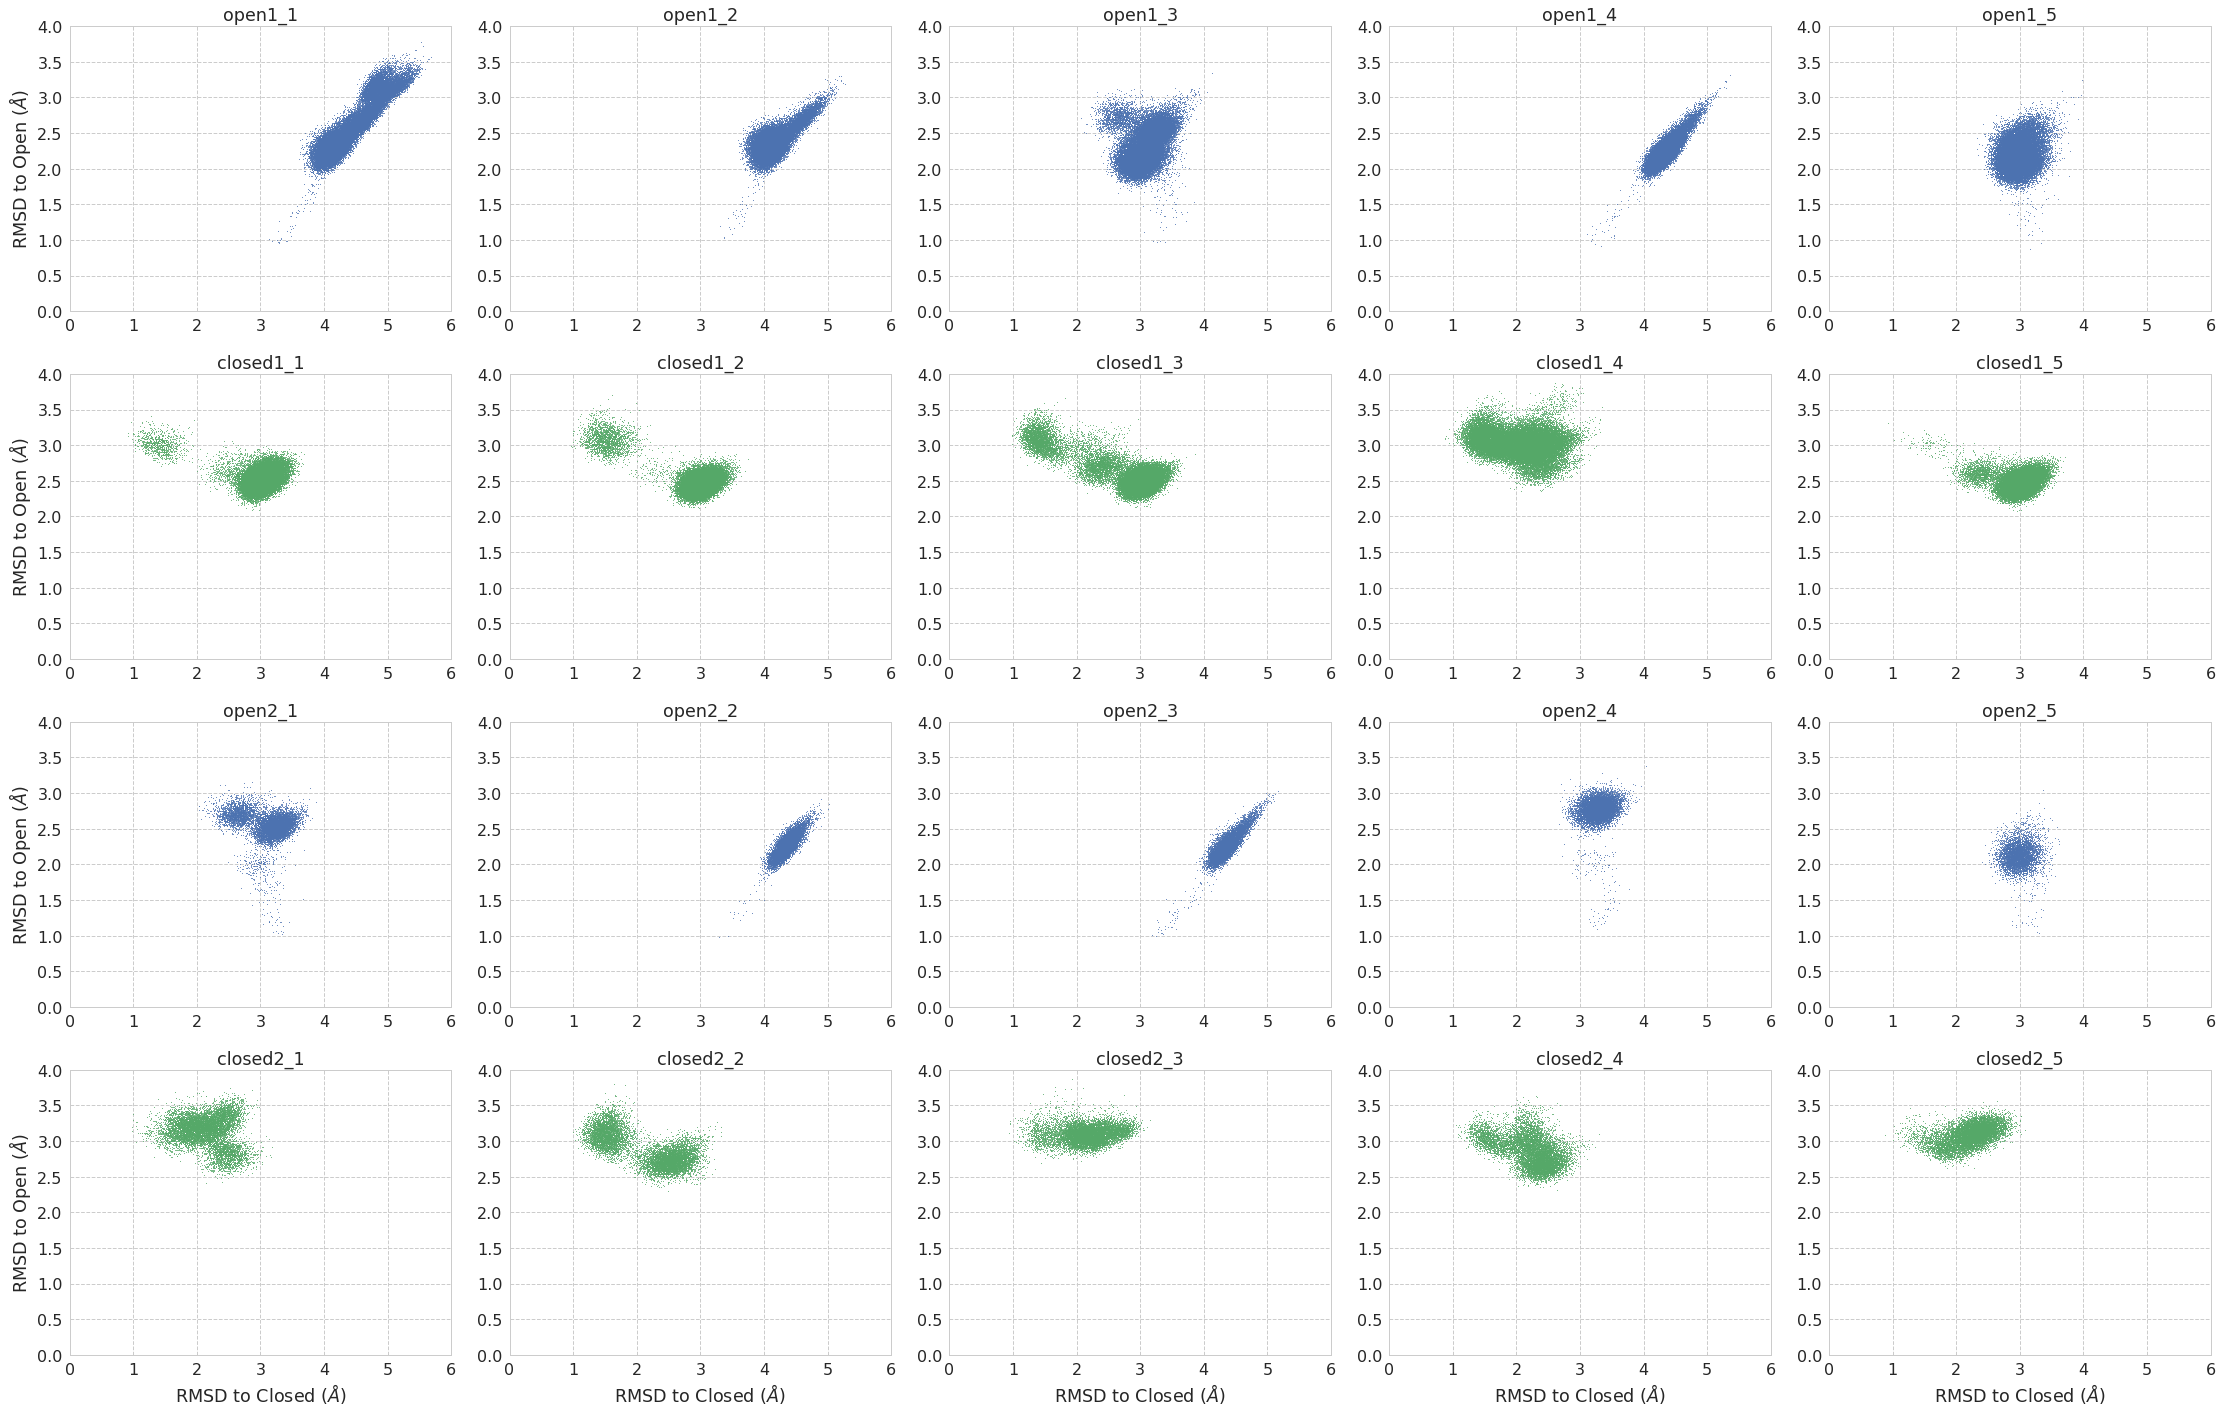

In [16]:
sns.set(context='notebook', style='whitegrid', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_all, col="Type_run", col_wrap=5, hue="Type", size=5, aspect=1.25,\
                     sharex=False, sharey=False, despine=False, legend_out=False)
grid = grid.map(plt.plot, r'RMSD to Closed ($\AA$)', r'RMSD to Open ($\AA$)', 
                marker=".", ms=2, ls='None').set_titles("{col_name}")
grid.set(xlim=(0, 6) , ylim=(0, 4))
plt.savefig('./rmsd_sing.png', dpi=400)
plt.savefig('./rmsd_sing.pdf')
plt.show()